# Tinanic challenges

In [1]:
import os 
import zipfile

competitions = 'playground-series-s4e2'
if not os.path.isfile(f'./{competitions}.zip'):
    os.system(f'kaggle competitions download -c {competitions}') 

if os.path.isfile(f'./{competitions}.zip'):
    with zipfile.ZipFile(f'./{competitions}.zip', 'r') as zip_ref:
        zip_ref.extractall('./data')

os.remove(f'./{competitions}.zip')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

test_data = pd.read_csv('./data/test.csv')
train_data = pd.read_csv('./data/train.csv')

C:\Users\willi\AppData\Local\Temp\ipykernel_19780\4183413583.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [21]:
test_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [22]:
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [58]:
train_data.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [24]:
train_data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [25]:
train_data.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [28]:
print(f'Unique values SMOKE: {train_data["SMOKE"].unique()}')
print(f'Unique values family_history_with_overweight: {train_data["family_history_with_overweight"].unique()}')
print(f'Unique values FAVC: {train_data["FAVC"].unique()}')
print(f'Unique values Gender: {train_data["Gender"].unique()}')
print(f'Unique values SCC: {train_data["SCC"].unique()}')
print(f'Unique values CALC: {train_data["CALC"].unique()}')
print(f'Unique values MTRANS: {train_data["MTRANS"].unique()}')
print(f'Unique values CAEC: {train_data["CAEC"].unique()}')

print(f'Unique values SMOKE: {test_data["SMOKE"].unique()}')
print(f'Unique values family_history_with_overweight: {test_data["family_history_with_overweight"].unique()}')
print(f'Unique values FAVC: {test_data["FAVC"].unique()}')
print(f'Unique values Gender: {test_data["Gender"].unique()}')
print(f'Unique values SCC: {test_data["SCC"].unique()}')
print(f'Unique values CALC: {test_data["CALC"].unique()}')
print(f'Unique values MTRANS: {test_data["MTRANS"].unique()}')
print(f'Unique values CAEC: {test_data["CAEC"].unique()}')


Unique values SMOKE: ['no' 'yes']
Unique values family_history_with_overweight: ['yes' 'no']
Unique values FAVC: ['yes' 'no']
Unique values Gender: ['Male' 'Female']
Unique values SCC: ['no' 'yes']
Unique values CALC: ['Sometimes' 'no' 'Frequently']
Unique values MTRANS: ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
Unique values CAEC: ['Sometimes' 'Frequently' 'no' 'Always']
Unique values SMOKE: ['no' 'yes']
Unique values family_history_with_overweight: ['yes' 'no']
Unique values FAVC: ['yes' 'no']
Unique values Gender: ['Male' 'Female']
Unique values SCC: ['no' 'yes']
Unique values CALC: ['Sometimes' 'no' 'Frequently' 'Always']
Unique values MTRANS: ['Public_Transportation' 'Automobile' 'Walking' 'Bike' 'Motorbike']
Unique values CAEC: ['Sometimes' 'Always' 'Frequently' 'no']


In [4]:
def preprocess(df: pd.DataFrame):
    df_return = df.copy()
    df_return['SMOKE'] = (df_return['SMOKE'] != 'no')
    df_return['SCC'] = (df_return['SCC'] != 'no')
    df_return['FAVC'] = (df_return['FAVC'] != 'no')
    df_return['family_history_with_overweight'] = (df_return['family_history_with_overweight'] != 'no')
    df_return = pd.concat([df_return, pd.get_dummies(df_return["CALC"], prefix="Calc")], axis=1)
    df_return = pd.concat([df_return, pd.get_dummies(df_return["Gender"], prefix="Gender")], axis=1)
    df_return = pd.concat([df_return, pd.get_dummies(df_return["CAEC"], prefix="Caec")], axis=1)
    df_return = pd.concat([df_return, pd.get_dummies(df_return["MTRANS"], prefix="Mtrans")], axis=1)
    # if 'Calc_Always' not in df_return.columns:
    #     df_return['Calc_Always'] = False
    # df_return = pd.concat([df_return, pd.get_dummies(df_return["NObeyesdad"], prefix="NObeyesdad")], axis=1)
    df_return = df_return.drop(columns=['id', 'Gender', 'CALC', 'CAEC', 'MTRANS'])
    return df_return

train_processed = preprocess(train_data)
test_processed = preprocess(test_data)

train_processed

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,...,Gender_Male,Caec_Always,Caec_Frequently,Caec_Sometimes,Caec_no,Mtrans_Automobile,Mtrans_Bike,Mtrans_Motorbike,Mtrans_Public_Transportation,Mtrans_Walking
0,24.443011,1.699998,81.669950,True,True,2.000000,2.983297,False,2.763573,False,...,True,False,False,True,False,False,False,False,True,False
1,18.000000,1.560000,57.000000,True,True,2.000000,3.000000,False,2.000000,False,...,False,False,True,False,False,True,False,False,False,False
2,18.000000,1.711460,50.165754,True,True,1.880534,1.411685,False,1.910378,False,...,False,False,False,True,False,False,False,False,True,False
3,20.952737,1.710730,131.274851,True,True,3.000000,3.000000,False,1.674061,False,...,False,False,False,True,False,False,False,False,True,False
4,31.641081,1.914186,93.798055,True,True,2.679664,1.971472,False,1.979848,False,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,25.137087,1.766626,114.187096,True,True,2.919584,3.000000,False,2.151809,False,...,True,False,False,True,False,False,False,False,True,False
20754,18.000000,1.710000,50.000000,False,True,3.000000,4.000000,False,1.000000,False,...,True,False,True,False,False,False,False,False,True,False
20755,20.101026,1.819557,105.580491,True,True,2.407817,3.000000,False,2.000000,False,...,True,False,False,True,False,False,False,False,True,False
20756,33.852953,1.700000,83.520113,True,True,2.671238,1.971472,False,2.144838,False,...,True,False,False,True,False,True,False,False,False,False


In [95]:
train_processed.isna().sum()

Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
NObeyesdad                        0
Calc_Frequently                   0
Calc_Sometimes                    0
Calc_no                           0
Gender_Female                     0
Gender_Male                       0
Caec_Always                       0
Caec_Frequently                   0
Caec_Sometimes                    0
Caec_no                           0
Mtrans_Automobile                 0
Mtrans_Bike                       0
Mtrans_Motorbike                  0
Mtrans_Public_Transportation      0
Mtrans_Walking                    0
dtype: int64

In [96]:
import seaborn as sns

sns.pairplot(data=train_processed, hue='NObeyesdad')

KeyboardInterrupt: 

In [4]:
def show_features_importances(model):
    # Organizing feature names and importances in a DataFrame
    features_df = pd.DataFrame({'features': model.feature_names_in_, 'importances': model.feature_importances_ })

    # Sorting data from highest to lowest
    features_df_sorted = features_df.sort_values(by='importances', ascending=False)

    # Barplot of the result without borders and axis lines
    g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
    sns.despine(bottom = True, left = True)
    g.set_title('Feature importances')
    g.set(xlabel=None)
    g.set(ylabel=None)
    g.set(xticks=[])
    for value in g.containers:
        g.bar_label(value, padding=2)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score

y = train_processed["NObeyesdad"]
X = train_processed.drop(columns=["NObeyesdad"])

In [31]:
X.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,...,Gender_Male,Caec_Always,Caec_Frequently,Caec_Sometimes,Caec_no,Mtrans_Automobile,Mtrans_Bike,Mtrans_Motorbike,Mtrans_Public_Transportation,Mtrans_Walking
0,24.443011,1.699998,81.669950,True,True,2.000000,2.983297,False,2.763573,False,...,True,False,False,True,False,False,False,False,True,False
1,18.000000,1.560000,57.000000,True,True,2.000000,3.000000,False,2.000000,False,...,False,False,True,False,False,True,False,False,False,False
2,18.000000,1.711460,50.165754,True,True,1.880534,1.411685,False,1.910378,False,...,False,False,False,True,False,False,False,False,True,False
3,20.952737,1.710730,131.274851,True,True,3.000000,3.000000,False,1.674061,False,...,False,False,False,True,False,False,False,False,True,False
4,31.641081,1.914186,93.798055,True,True,2.679664,1.971472,False,1.979848,False,...,True,False,False,True,False,False,False,False,True,False


In [8]:
y.head()

0    Overweight_Level_II
1          Normal_Weight
2    Insufficient_Weight
3       Obesity_Type_III
4    Overweight_Level_II
Name: NObeyesdad, dtype: object

In [6]:
num_folds = 20
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

model_rfc = RandomForestClassifier(random_state=4)
# model_rfc.fit(X_train, y_train)
scores = cross_val_score(model_rfc, X_train, y_train, cv=kf)


# Exibir as pontuações para cada fold
for fold, score in enumerate(scores, 1):
    print(f"Fold {fold}: {score:.4f}")

# Calcular a média das pontuações
media_pontuacoes = scores.mean()
print(f"Média das pontuações: {media_pontuacoes:.4f}")

# prediction_rfc = model_rfc.predict(X_test)

# print(accuracy_score(y_test, prediction_rfc))

# show_features_importances(model_rfc)

# 0.8959537572254336

Fold 1: 0.8845
Fold 2: 0.9061
Fold 3: 0.8821
Fold 4: 0.9037
Fold 5: 0.9001
Fold 6: 0.8821
Fold 7: 0.8928
Fold 8: 0.8916
Fold 9: 0.8940
Fold 10: 0.8892
Fold 11: 0.8976
Fold 12: 0.8855
Fold 13: 0.9072
Fold 14: 0.8928
Fold 15: 0.8723
Fold 16: 0.9133
Fold 17: 0.8964
Fold 18: 0.8904
Fold 19: 0.9048
Fold 20: 0.9048
Média das pontuações: 0.8946


In [162]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model_rfc = LogisticRegression()
model_rfc.fit(X_train, y_train)
prediction_rfc = model_rfc.predict(X_test)

print(accuracy_score(y_test, prediction_rfc))

0.8044692737430168


d:\Projetos\Python\Kaggle\titanic_ml\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [156]:
X_train

,Pclass,Sex_female,Sex_male,SibSp,Fare,Age,no_cabin
331,1,0,1,0,28.5000,45.500000,0
733,2,0,1,0,13.0000,23.000000,1
382,3,0,1,0,7.9250,32.000000,1
704,3,0,1,1,7.8542,26.000000,1
813,3,1,0,4,31.2750,6.000000,1
...,...,...,...,...,...,...,...
106,3,1,0,0,7.6500,21.000000,1
270,1,0,1,0,31.0000,30.726645,1
860,3,0,1,2,14.1083,41.000000,1
435,1,1,0,1,120.0000,14.000000,0


In [148]:
train_data.sort_values(by='Age', ascending=False).head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_cabin,Cabin_count,Sex_bin,Sex_female,Sex_male
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,0,1,1,0,1
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,1,0,1,0,1
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0,1,1,0,1
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,1,0,1,0,1
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,1,0,1,0,1
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S,1,0,1,0,1
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,0,1,1,0,1
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,1,0,1,0,1
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S,0,1,1,0,1
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,0,1,1,0,1


In [83]:
X_test['Survived_predict'] = prediction_rfc
X_test['Survived'] = y_test
X_test

,Pclass,SibSp,Fare,Age,no_cabin,Sex_female,Sex_male,Survived_predict,Survived
709,3,1,15.2458,30.726645,True,False,True,0,1
439,2,0,10.5000,31.000000,True,False,True,0,0
840,3,0,7.9250,20.000000,True,False,True,0,0
720,2,0,33.0000,6.000000,True,True,False,1,1
39,3,1,11.2417,14.000000,True,True,False,0,1
...,...,...,...,...,...,...,...,...,...
433,3,0,7.1250,17.000000,True,False,True,0,0
773,3,0,7.2250,30.726645,True,False,True,0,0
25,3,1,31.3875,38.000000,True,True,False,0,1
84,2,0,10.5000,17.000000,True,True,False,1,1


In [19]:
print(f'{X_train.shape} {X_test.shape} {y_train.shape} {y_test.shape}')

(16606, 26) (4152, 26) (16606,) (4152,)


* Create train random forest

In [81]:
model = RandomForestClassifier(random_state=5)
model.fit(X, y)
prediction = model.predict(test_processed)
output = pd.DataFrame({'id': test_data.id, 'NObeyesdad': prediction})
output.to_csv('submission.csv', index=False)

In [76]:
# Encontrar diferença nas colunas
diferenca_colunas_df1_df2 = X.columns.difference(test_processed.columns)
diferenca_colunas_df2_df1 = test_processed.columns.difference(X.columns)

print("Diferença de colunas de df1 para df2:", diferenca_colunas_df1_df2)
print("Diferença de colunas de df2 para df1:", diferenca_colunas_df2_df1)

print(len(X.columns))
print(len(test_processed.columns))
print(X.columns)
print(test_processed.columns)

Diferença de colunas de df1 para df2: Index([], dtype='object')
Diferença de colunas de df2 para df1: Index([], dtype='object')
27
28
Index(['Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'Calc_Always',
       'Calc_Frequently', 'Calc_Sometimes', 'Calc_no', 'Gender_Female',
       'Gender_Male', 'Caec_Always', 'Caec_Frequently', 'Caec_Sometimes',
       'Caec_no', 'Mtrans_Automobile', 'Mtrans_Bike', 'Mtrans_Motorbike',
       'Mtrans_Public_Transportation', 'Mtrans_Walking'],
      dtype='object')
Index(['Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'Calc_Always',
       'Calc_Always', 'Calc_Frequently', 'Calc_Sometimes', 'Calc_no',
       'Gender_Female', 'Gender_Male', 'Caec_Always', 'Caec_Frequently',
       'Caec_Sometimes', 'Caec_no', 'Mtrans_Automobile', 'Mtrans_Bike',
       'Mtrans_Motorbike', 'Mtrans_Public_Transpo

* Create train with decicion tre

C:\Users\willi\AppData\Local\Temp\ipykernel_6096\1605094758.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")


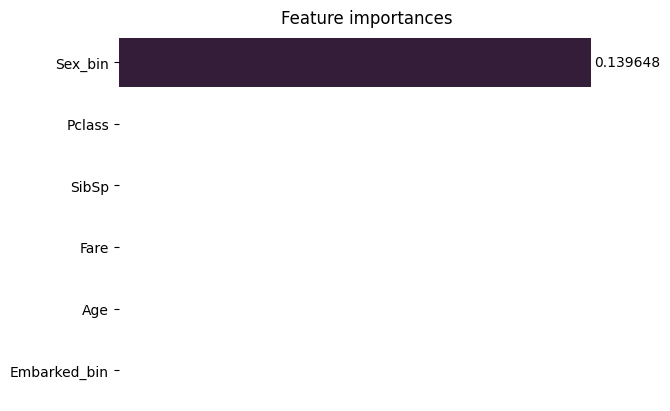

In [387]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()
model_tree.fit(X, y)
prediction_tree = model_tree.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

# cm = confusion_matrix(y_test, prediction)

# print(classification_report(y_test, prediction_tree))

show_features_importances(model_tree)

* Create train with linear regression

In [389]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
# Ajustar o modelo aos dados
model_lr.fit(X, y)
prediction_lr = model_lr.predict(X_test)

show_features_importances(model_lr)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

* Create train with SVC

In [187]:
from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(X_train, y_train)
predict_svc = model_svc.predict(X_test)

print(classification_report(y_test, predict_svc))

              precision    recall  f1-score   support

           0       0.65      0.91      0.76       106
           1       0.68      0.29      0.40        73

    accuracy                           0.65       179
   macro avg       0.66      0.60      0.58       179
weighted avg       0.66      0.65      0.61       179

